## Heath Service Industry Analysis Project

#### Load Data and Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
import nltk


# Read the datasets
major_groups = pd.read_csv('major_groups.csv')
public_firms = pd.read_csv('public_firms.csv')
item1_full = pd.read_csv('2020_10K_item1_full.csv')

In [3]:
item1_full

,cik,year,name,item_1_text,gvkey
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
...,...,...,...,...,...
5476,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829
5477,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430
5478,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050
5479,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595


##### Part of the code is implemented by copilot's autocomplete

### Part 1. Quantitative Analysis of the Industry Sector

#### Note:   Choose industry  80

#### Part 1A

In [4]:
# Convert 'sic' to string and filter based on the first two digits
public_firms['sic_str'] = public_firms['sic'].astype(str)
filtered_firms = public_firms[public_firms['sic_str'].str[:2] == '80']

# Drop the auxiliary 'sic_str' column if you don't need it anymore
public_firms_filtered = filtered_firms.drop(columns=['sic_str'])

# Show the filtered DataFrame
public_firms_filtered


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
1588,1431,1994,USA,AMERICAN CYTOGENETICS,NaN,8071,NaN,0.035,-0.205,1.339,5.454,-0.153099
1589,1431,1995,USA,AMERICAN CYTOGENETICS,NaN,8071,0.031,0.020,-0.484,1.124,4.682,-0.430605
2064,1559,1995,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.312,0.452,7.344,31.345,34.077,0.234296
2065,1559,1996,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.812,0.368,-0.353,32.969,36.989,-0.010707
2066,1559,1997,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.750,0.017,1.522,30.209,37.172,0.050382
...,...,...,...,...,...,...,...,...,...,...,...,...
207946,265008,2011,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,10.177,-353.441,998.592,644.717,-0.353939
207947,265008,2012,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,15.410,-154.208,922.301,693.951,-0.167199
207948,265008,2013,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,17.462,-80.214,1128.191,736.516,-0.071100
207949,265008,2014,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,99.082,-357.291,1153.444,1018.182,-0.309760


In [5]:
# Part A - Question 3a: How many unique firm-year ("fyear") observations are there in the filtered dataset?
unique_firm_years = public_firms_filtered[['fyear']].nunique()
print(f"Number of unique firm-year observations: {unique_firm_years}")

# Part A - Question 3b: How many unique firms are there in the filtered dataset?
num_unique_firms = public_firms_filtered['gvkey'].nunique()
print(f"Number of unique firms: {num_unique_firms}")

# Part A - Question 3c: How many firms in the filtered dataset have records over all 27 years (1994-2020)?
# First, get the years for each firm
years_per_firm = public_firms_filtered.groupby('gvkey')['fyear'].nunique()
# Firms with records over all 27 years
firms_all_years = years_per_firm[years_per_firm == 27]
num_firms_all_years = firms_all_years.shape[0]
print(f"Number of firms with records over all 27 years (1994-2020): {num_firms_all_years}")


Number of unique firm-year observations: fyear    27
dtype: int64
Number of unique firms: 358
Number of firms with records over all 27 years (1994-2020): 2


#### B

In [6]:
# Part B - Question 1: Top 10 firms with the highest stock price in 2020
# Filter data for the year 2020
data_2020 = public_firms_filtered[public_firms_filtered['fyear'] == 2020]

# Sort the data by 'prcc_c' in descending order and get the top 10 rows
top10_stock_price_2020 = data_2020.sort_values(by='prcc_c', ascending=False).head(10)
print("Top 10 firms with the highest stock price in 2020:")
print(top10_stock_price_2020[['conm', 'prcc_c']])


Top 10 firms with the highest stock price in 2020:
                               conm  prcc_c
7723                    CHEMED CORP  532.61
107521                 AMEDISYS INC  293.33
183851                LHC GROUP INC  213.32
58187   LABORATORY CP OF AMER HLDGS  203.55
82137            TELADOC HEALTH INC  199.96
77060            HCA HEALTHCARE INC  164.46
41013     UNIVERSAL HEALTH SVCS INC  137.50
87614      U S PHYSICAL THERAPY INC  120.25
135469        QUEST DIAGNOSTICS INC  119.17
121189                   DAVITA INC  117.40


In [7]:
# Part B - Question 2: Top 10 firms with the highest sales in the entire history of the dataset
# Sort the data by the max 'sale' of each company in descending order and get the top 10 rows
max_sales = public_firms_filtered.groupby('conm')['sale'].max().reset_index()
top10_max_sales = max_sales.sort_values(by='sale', ascending=False).head(10)

print("Top 10 firms with the highest sales in the entire history of the dataset:")
print(top10_max_sales[['conm', 'sale']])


Top 10 firms with the highest sales in the entire history of the dataset:
                             conm       sale
130            HCA HEALTHCARE INC  51533.000
117  FRESENIUS MEDICAL CARE AG&CO  21527.065
326         TENET HEALTHCARE CORP  19621.000
69   COMMUNITY HEALTH SYSTEMS INC  19437.000
84                     DAVITA INC  14745.105
178   LABORATORY CP OF AMER HLDGS  13995.500
343     UNIVERSAL HEALTH SVCS INC  11378.259
271         QUEST DIAGNOSTICS INC   9437.000
100      ENVISION HEALTHCARE CORP   7819.300
174        KINDRED HEALTHCARE INC   7219.519


In [8]:
# Part B - Question 3: Geographical distribution of firms
# Get unique firms and their locations
# Count firms per location
# Pat of the following content is generated by chatgpt
firms_per_location = public_firms_filtered.groupby('location')['gvkey'].nunique()
# Sort the data by the number of firms in descending order and get the top 10 rows
top10_locations = firms_per_location.sort_values(ascending=False).head(10)
print("Top 10 locations by number of firms:")
print(top10_locations)


Top 10 locations by number of firms:
location
USA    344
CAN      5
CHN      5
HKG      2
AUS      1
DEU      1
Name: gvkey, dtype: int64


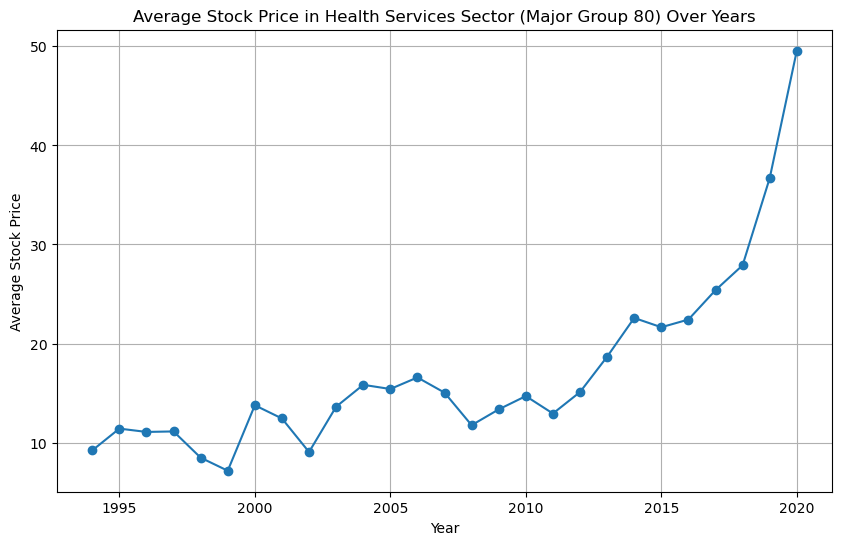

In [9]:
# Part B - Question 4: Line chart of average stock price over years
# Calculate average stock price per year
avg_stock_price_per_year = public_firms_filtered.groupby('fyear')['prcc_c'].mean()
# Plot the line chart
plt.figure(figsize=(10,6))
plt.plot(avg_stock_price_per_year.index, avg_stock_price_per_year.values, marker='o')
plt.title('Average Stock Price in Health Services Sector (Major Group 80) Over Years')
plt.xlabel('Year')
plt.ylabel('Average Stock Price')
plt.grid(True)
plt.show()

In [10]:
# Part B - Question 5: Firm most affected by the 2008 Financial Crisis
# Get data for 2007 and 2008
data_2007 = public_firms_filtered[public_firms_filtered['fyear'] == 2007][['gvkey', 'prcc_c']]
data_2008 = public_firms_filtered[public_firms_filtered['fyear'] == 2008][['gvkey', 'prcc_c']]
# Merge the data on 'gvkey'
data_2007_2008 = pd.merge(data_2007, data_2008, on='gvkey', suffixes=('_2007', '_2008'))
# Calculate percentage drop
data_2007_2008['perc_drop'] = ((data_2007_2008['prcc_c_2007'] - data_2007_2008['prcc_c_2008']) / data_2007_2008['prcc_c_2007']) * 100
# Handle division by zero or missing data
data_2007_2008 = data_2007_2008.dropna(subset=['perc_drop'])

# Find the firm with the min percentage drop
max_drop_firm = data_2007_2008.loc[data_2007_2008['perc_drop'].idxmax()]
# Get the firm name
firm_name = public_firms_filtered.loc[public_firms_filtered['gvkey'] == max_drop_firm['gvkey'], 'conm'].iloc[0]
print(f"The firm most affected by the 2008 Financial Crisis is {firm_name} with a percentage drop of {max_drop_firm['perc_drop']:.2f}% in stock price from 2007 to 2008.")

The firm most affected by the 2008 Financial Crisis is INSIGHT HEALTH SVCS HLDG CP with a percentage drop of 99.33% in stock price from 2007 to 2008.


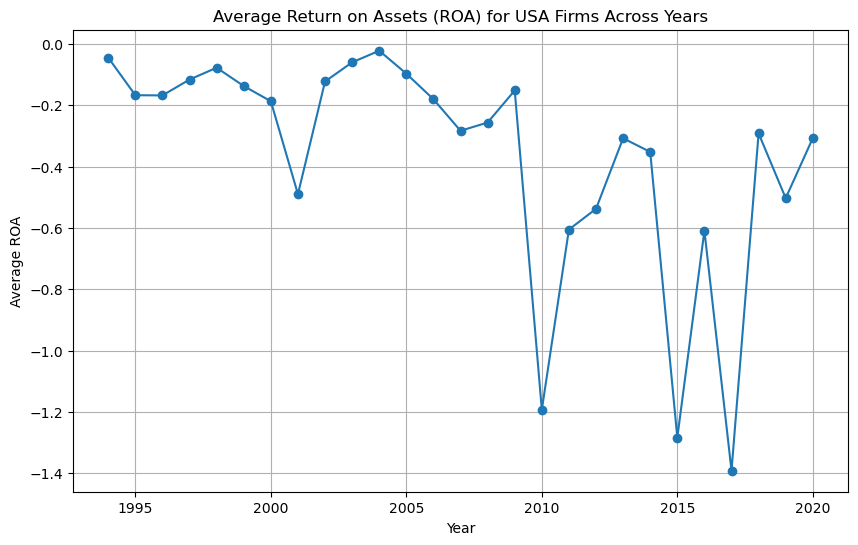

In [11]:
# Part B - Question 6:
# Calculate ROA as ni / asset
public_firms_filtered['roa'] = public_firms_filtered['ni'] / public_firms_filtered['asset']

# Filter data for firms located in the USA
usa_firms = public_firms_filtered[public_firms_filtered['location'] == 'USA']

# Calculate ROA as ni / asset
public_firms_filtered['roa'] = public_firms_filtered['ni'] / public_firms_filtered['asset']

# Group by year and calculate the average ROA per year
avg_roa_per_year = usa_firms.groupby('fyear')['roa'].mean()

# Plot the average ROA across the years
plt.figure(figsize=(10,6))
plt.plot(avg_roa_per_year.index, avg_roa_per_year.values, marker='o')
plt.title('Average Return on Assets (ROA) for USA Firms Across Years')
plt.xlabel('Year')
plt.ylabel('Average ROA')
plt.grid(True)
plt.show()


### Part2 C

In [12]:
nltk.download('stopwords')
# Define the stopwords list and punctuation translator
item1_full = pd.read_csv('2020_10K_item1_full.csv')

translator = str.maketrans('', '', string.punctuation)
sw = stopwords.words('english')
# Function to clean text
def clean_text(text):
    ''' This function takes a string as input and 
        returns a cleaned version of the string
        Specifically, it makes the string into lower case and remove punctuations
    '''
    text_lower = text.lower() # make it lowercase
    text_no_punctuation = text_lower.translate(translator) # remove punctuation  
    clean_words = [w for w in text_no_punctuation.split() if w not in sw] # remove stopwords
    return ' '.join(clean_words)


# Apply the cleaning function to 'item_1' content and store in a new column
item1_full['item_1_clean'] = item1_full['item_1_text'].apply(clean_text)


# Show the cleaned dataframe
item1_full[['item_1_clean']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuhaibin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,item_1_clean
0,fixed expenses previosuly documented 8k 235000...
1,general hurco companies inc international indu...
2,engaged business developing marketing products...
3,corporate history chun capital group formerly ...
4,corporate history chun capital group formerly ...


In [13]:
item1_full

,cik,year,name,item_1_text,gvkey,item_1_clean
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses previosuly documented 8k 235000...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc international indu...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,engaged business developing marketing products...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
...,...,...,...,...,...,...
5476,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829,general rf industries ltd together subsidiarie...
5477,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430,background capital structure know labs inc inc...
5478,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050,general gee group inc company us incorporated ...
5479,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595,general gulfslope energy inc independent crude...


### D

In [14]:
#The following content is generated by Chatgpt
merged_data = pd.merge(public_firms_filtered, item1_full, how='inner', on='gvkey')

In [15]:
def get_top_keywords(text):
    c = Counter(str(text).split())
    words = []
    for pair in c.most_common(10):
        words.append(pair[0])
    return ' '.join(words) 

def get_keywords_tfidf(document_list):
    '''
    This function gets a list of documents as input and returns a list of top 10 keywords for each document using TF-IDF scores.
    Input: A list of documents (text)
    Output: The corresponding top 10 keywords for each document based on tf-idf values
    '''
    vectorizer = TfidfVectorizer() # Step 1: Create a TF-IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(document_list) # Step 2: Calculate the TF-IDF matrix
    feature_names = vectorizer.get_feature_names_out() # Step 3: Get feature names (words)

    # Step 4: Extract top 10 keywords for each document
    top_keywords = [] # accumulator
    for i in range(len(document_list)):
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        feature_value = [tfidf_matrix[i, x] for x in feature_index]
        tfidf_scores = zip(feature_index, feature_value)
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))

        if i % 200 == 199:
            print(f'Processed {i+1}/{len(document_list)} documents.')
    
    return top_keywords

In [16]:
# Apply to get top 10 keywords by word count
merged_data['top_keywords_word_count'] = merged_data['item_1_clean'].apply(get_top_keywords)

In [17]:
tfidf_keywords = get_keywords_tfidf(merged_data['item_1_clean'])

merged_data['top_keyword_tfidf'] = tfidf_keywords

Processed 200/1218 documents.
Processed 400/1218 documents.
Processed 600/1218 documents.
Processed 800/1218 documents.
Processed 1000/1218 documents.
Processed 1200/1218 documents.


In [18]:
merged_data = merged_data.drop_duplicates(subset=['top_keywords_word_count'], keep='first')
merged_data = merged_data.drop_duplicates(subset=['top_keyword_tfidf'], keep='first')

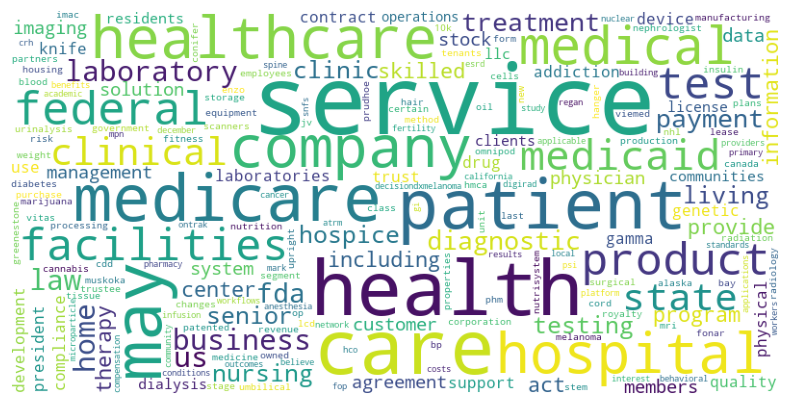

In [19]:
# prepare text
text1 = ' '.join(merged_data['top_keywords_word_count'].tolist())

# lower max_font_size
wordcloud1 = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(text1) # note that text is a string, not a list

plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud1)
plt.show()

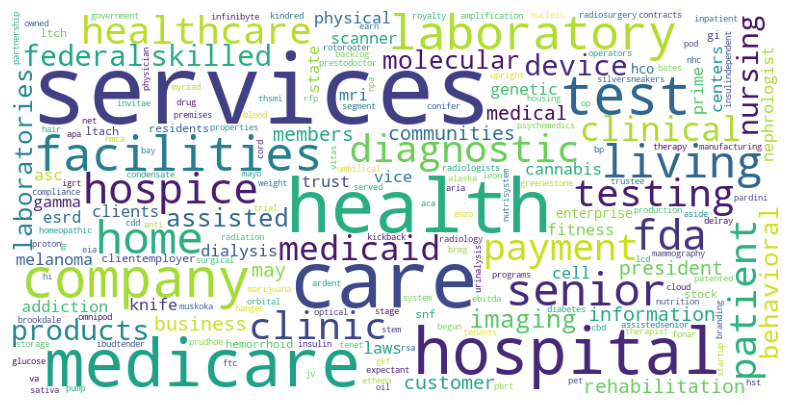

In [20]:
# prepare text
text2 = ' '.join(merged_data['top_keyword_tfidf'].tolist())

# lower max_font_size
wordcloud2 = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(text2) # note that text is a string, not a list

plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud2)
plt.savefig('keyword_all.png') # save as PNG file
plt.show()

### E

In [21]:
# Prepare the data for Word2Vec by tokenizing the cleaned text
tokenized_text = merged_data['item_1_clean'].apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=5, workers=4)

# Save the model for future use
# word2vec_model.save("word2vec_10K.model")


In [22]:
# Select three representative keywords from the word clouds (e.g., 'growth', 'market', 'profit')
keywords = ['laboratory', 'trust', 'facilities']

# Find the top 5 most similar words for each keyword
for keyword in keywords:
    if keyword in word2vec_model.wv:
        similar_words = word2vec_model.wv.most_similar(keyword, topn=5)
        print(f"Top 5 words similar to '{keyword}':")
        for word, similarity in similar_words:
            print(f"  {word}: {similarity:.4f}")
    else:
        print(f"Keyword '{keyword}' not found in the vocabulary.")


Top 5 words similar to 'laboratory':
  laboratories: 0.8970
  testing: 0.8637
  clinical: 0.8425
  farmingdale: 0.7725
  proficiency: 0.7711
Top 5 words similar to 'trust':
  alaska: 0.9377
  bp: 0.9375
  trustee: 0.9341
  split: 0.9084
  stock: 0.9068
Top 5 words similar to 'facilities':
  assisted: 0.8549
  skilled: 0.8544
  communities: 0.8521
  surgical: 0.8450
  facility: 0.8380


### F

In [23]:
# Filter
hca_data = merged_data[merged_data['conm'].str.contains('HCA Healthcare Inc', case=False, na=False)]
# Function to compute firm embedding
def get_firm_embedding(text, model):
    words = text.split()
    embedding = sum([model.wv[word] for word in words if word in model.wv], start=0)
    return embedding
# Get HCA's firm-level embedding
hca_embedding = get_firm_embedding(hca_data['item_1_clean'].iloc[0], word2vec_model)
# Calculate embeddings for all other firms and compute similarity with HCA Healthcare Inc
similarity_scores = []
for index, row in merged_data.iterrows():
    if row['conm'] != 'HCA Healthcare Inc':  # Skip HCA itself
        firm_embedding = get_firm_embedding(row['item_1_clean'], word2vec_model)
        similarity = word2vec_model.wv.cosine_similarities(hca_embedding, [firm_embedding])[0]
        similarity_scores.append((row['conm'], similarity))
# Sort by similarity and find the most similar firms
similar_firms = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[:10]  # Top 10 most similar firms
similar_firms

[('HCA HEALTHCARE INC', 1.0),
 ('QUORUM HEALTH CORP', 0.99600524),
 ('COMMUNITY HEALTH SYSTEMS INC', 0.99458486),
 ('LHC GROUP INC', 0.99429435),
 ('ENCOMPASS HEALTH CORP', 0.9923553),
 ('ADDUS HOMECARE CORP', 0.9900756),
 ('GENESIS HEALTHCARE INC', 0.9878659),
 ('DAVITA INC', 0.98719794),
 ('AMEDISYS INC', 0.9864401),
 ('CHEMED CORP', 0.98327345)]

                              conm       sale  market_share       roa
26                     CHEMED CORP    699.165      2.629732  0.043586
217          ENCOMPASS HEALTH CORP   1556.687      5.855085  0.032091
418             HCA HEALTHCARE INC  17695.000     66.555271  0.048311
453         GENESIS HEALTHCARE INC   5619.224     21.135291 -0.069966
459   COMMUNITY HEALTH SYSTEMS INC    562.745      2.116623  0.038021
628                   AMEDISYS INC     37.589      0.141382  0.081650
712                     DAVITA INC     98.968      0.372243  0.062560
1061                 LHC GROUP INC    122.980      0.462558  0.195985
1177           ADDUS HOMECARE CORP    194.567      0.731815  0.001660


/var/folders/18/s37phwj512j41sptm1cgjgz80000gn/T/ipykernel_16392/1802548992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_firms['market_share'] = selected_firms['sale'] / total_revenue * 100


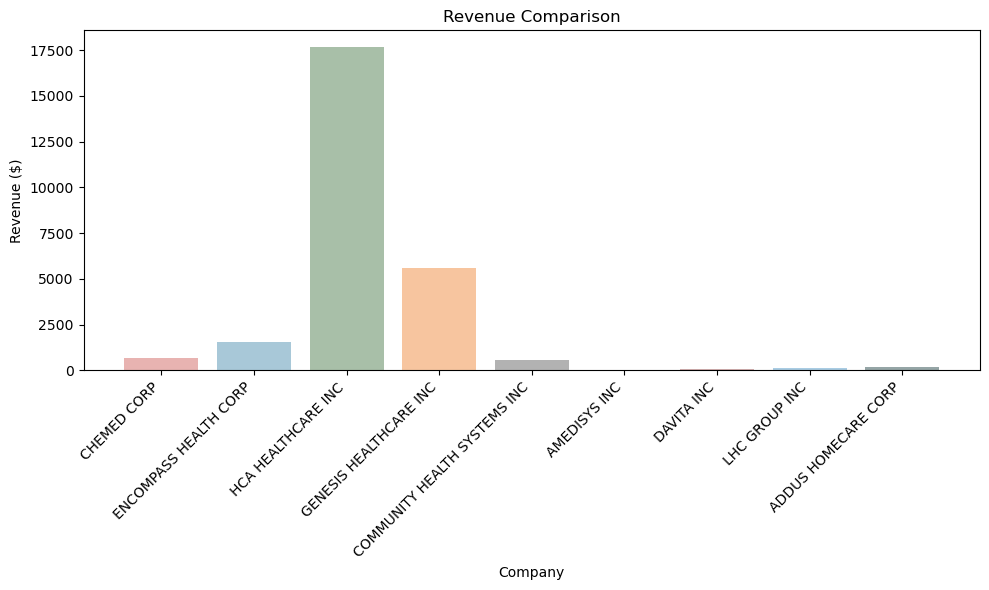

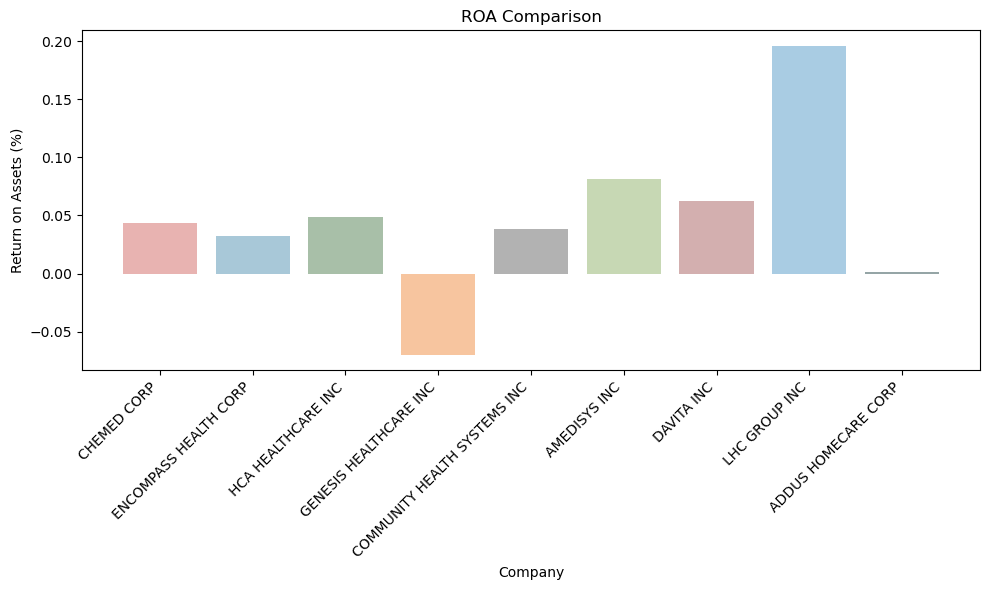

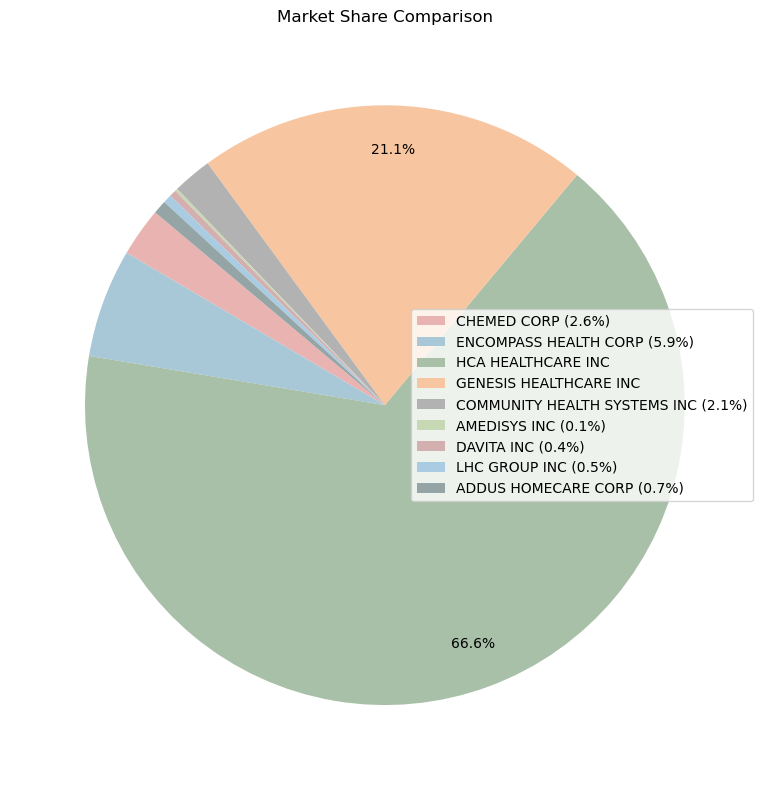

In [24]:
# Define the focal firm and all selected competitors
firms = [
    'HCA HEALTHCARE INC', 'COMMUNITY HEALTH SYSTEMS INC', 'LHC GROUP INC',
    'ENCOMPASS HEALTH CORP', 'ADDUS HOMECARE CORP', 'GENESIS HEALTHCARE INC',
    'AMEDISYS INC', 'DAVITA INC', 'CHEMED CORP'
]

# Filter the dataset for the selected firms
selected_firms = merged_data[merged_data['conm'].isin(firms)]

# Calculate Market Share (Assuming 'sale' represents revenue)
total_revenue = selected_firms['sale'].sum()
selected_firms['market_share'] = selected_firms['sale'] / total_revenue * 100

# Select relevant columns
comparison_df = selected_firms[['conm', 'sale', 'market_share', 'roa']]
print(comparison_df)
# Plot Revenue Comparison
plt.figure(figsize=(10,6))
plt.bar(comparison_df['conm'], comparison_df['sale'], color=['#E8B3B1', '#A8C8D8', '#A8BFA8', '#F7C59F', '#B2B2B2', '#C7D8B4', '#D3AFAF', '#A9CCE3', '#95A5A6'])
plt.title('Revenue Comparison')
plt.xlabel('Company')
plt.ylabel('Revenue ($)')

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust the layout to make room for x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

# Plot ROA Comparison
plt.figure(figsize=(10,6))
plt.bar(comparison_df['conm'], comparison_df['roa'], color=['#E8B3B1', '#A8C8D8', '#A8BFA8', '#F7C59F', '#B2B2B2', '#C7D8B4', '#D3AFAF', '#A9CCE3', '#95A5A6'])
plt.title('ROA Comparison')
plt.xlabel('Company')
plt.ylabel('Return on Assets (%)')

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# The following content is generated by chatgpt
# Custom function to display percentages only for values >= 20%
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct >= 20 else ''

# Plot Market Share Comparison as Pie Chart with Legend for values < 20%
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    comparison_df['market_share'], 
    labels=None, 
    autopct=autopct_func,  
    pctdistance=0.85,  
    startangle=140, 
    colors=['#E8B3B1', '#A8C8D8', '#A8BFA8', '#F7C59F', '#B2B2B2', '#C7D8B4', '#D3AFAF', '#A9CCE3', '#95A5A6']
)

# Set the title
plt.title('Market Share Comparison')

# Create a legend for companies with less than 20% market share
legend_labels = [f'{firm} ({pct:.1f}%)' if pct < 20 else firm for firm, pct in zip(comparison_df['conm'], comparison_df['market_share'])]
plt.legend(wedges, legend_labels, loc="best")

# Adjust layout and show the pie chart
plt.tight_layout()
plt.show()



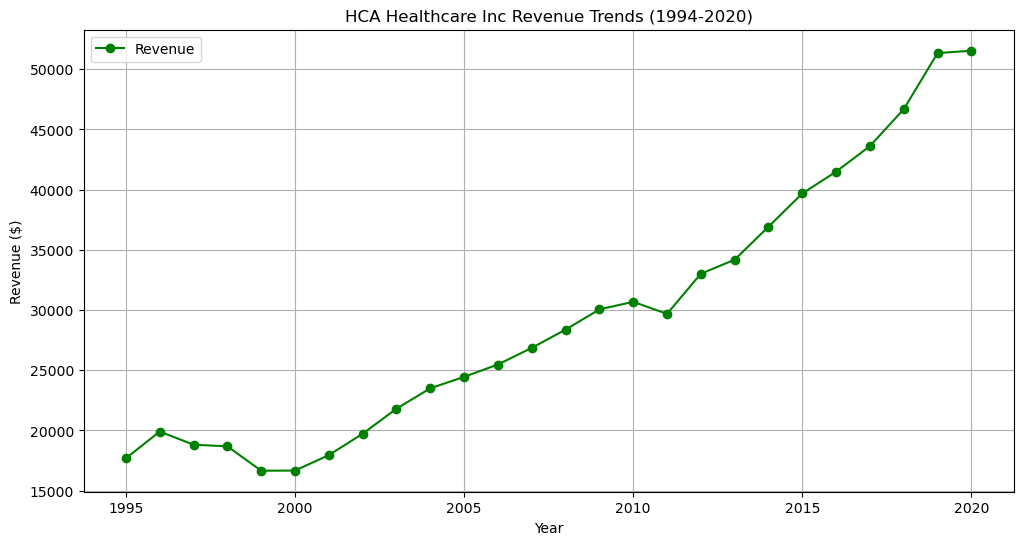

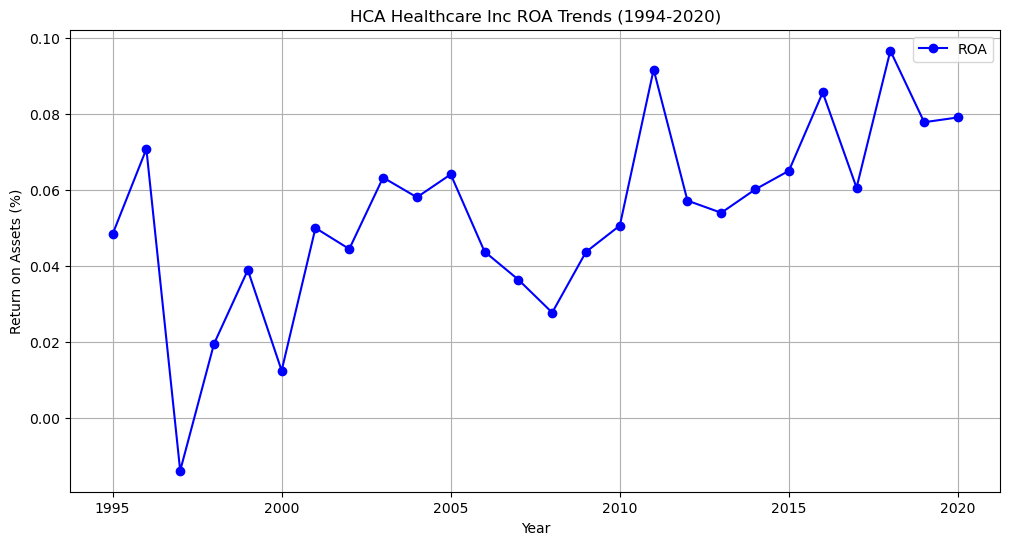

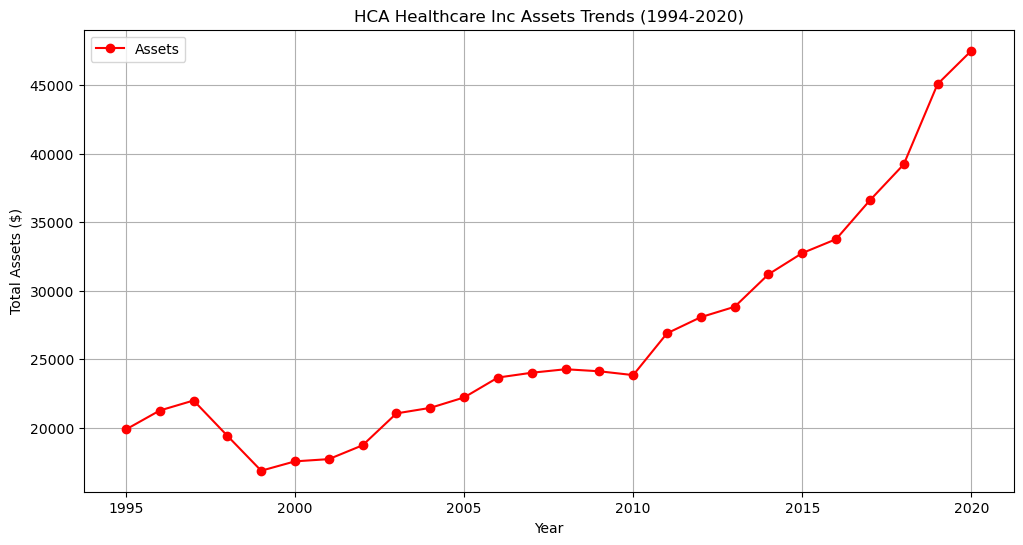

In [25]:
# Filter
hca_data = public_firms_filtered[public_firms_filtered['conm'] == 'HCA HEALTHCARE INC']

# Plot Revenue Trend Over Years for HCA Healthcare Inc
plt.figure(figsize=(12, 6))
plt.plot(hca_data['fyear'], hca_data['sale'], marker='o', color='green', label='Revenue')
plt.title('HCA Healthcare Inc Revenue Trends (1994-2020)')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.legend()
plt.show()

# Plot ROA Trend Over Years for HCA Healthcare Inc
plt.figure(figsize=(12, 6))
plt.plot(hca_data['fyear'], hca_data['roa'], marker='o', color='blue', label='ROA')
plt.title('HCA Healthcare Inc ROA Trends (1994-2020)')
plt.xlabel('Year')
plt.ylabel('Return on Assets (%)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Assets Trend Over Years for HCA Healthcare Inc
plt.figure(figsize=(12, 6))
plt.plot(hca_data['fyear'], hca_data['asset'], marker='o', color='red', label='Assets')
plt.title('HCA Healthcare Inc Assets Trends (1994-2020)')
plt.xlabel('Year')
plt.ylabel('Total Assets ($)')
plt.grid(True)
plt.legend()
plt.show()